In [31]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
file_path = r'C:\Users\Dell\Documents\GitHub\opf\data\raw\acndata_sessions.json'
with open(file_path, 'r') as f:
    file_contents = f.read()
    data_ev = json.loads(file_contents)

In [9]:
data_ev = data_ev['_items']
df_ev = pd.DataFrame(data_ev)

In [10]:
# Assuming your dataframe is named "df"
df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'])
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'])
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'])

In [11]:
df_ev.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


In [12]:
df_ev['duration'] = ((df_ev['disconnectTime'] - df_ev['connectionTime'])/ np.timedelta64(1, 'h')).round(decimals=0)

<BarContainer object of 20 artists>

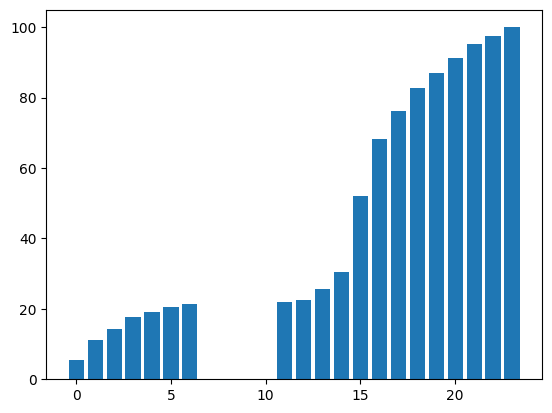

In [33]:
start_charge_time = df_ev.groupby(df_ev['connectionTime'].dt.hour)['_id'].count().reset_index()
sum_counts = start_charge_time['_id'].sum()
start_charge_time['probability'] = (start_charge_time['_id']/sum_counts)
start_charge_time.drop('_id',axis = 1, inplace=True)
start_charge_time
# Calculate cumulative probabilities
start_charge_time['cumulative_prob'] = start_charge_time['probability'].cumsum()
plt.bar(start_charge_time['connectionTime'],start_charge_time['cumulative_prob']*100)

<BarContainer object of 20 artists>

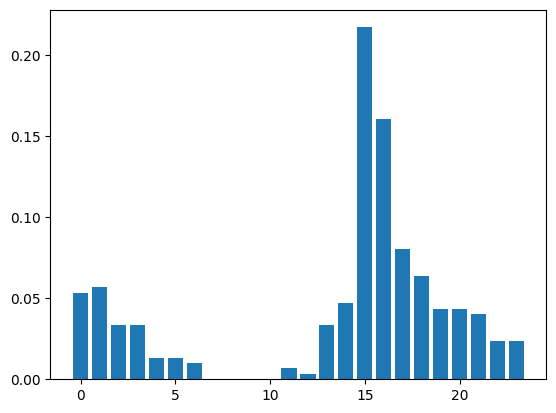

In [34]:
plt.bar(start_charge_time.connectionTime,start_charge_time.probability)

In [50]:
# Assuming your DataFrame is called 'df' and the column you want to filter is 'column_name'
Q1 = df_ev['duration'].quantile(0.25)
Q3 = df_ev['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 0.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [51]:
mask = (df_ev['duration'] >= lower_threshold) & (df_ev['duration'] <= upper_threshold)
df_ev = df_ev[mask]

<BarContainer object of 19 artists>

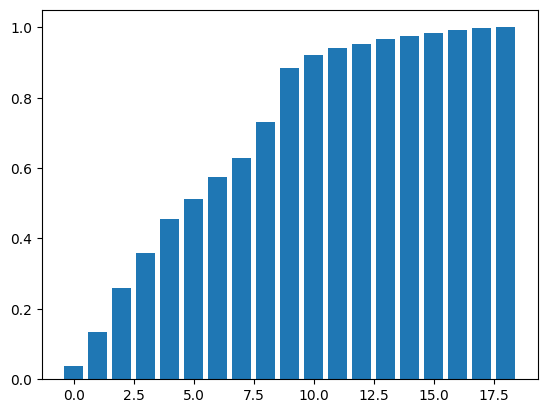

In [52]:
duration_time = df_ev.groupby(df_ev['duration'])['_id'].count().reset_index()
sum_counts = duration_time['_id'].sum()
duration_time['probability'] = (duration_time['_id']/sum_counts)
duration_time.drop('_id',axis = 1, inplace=True)
duration_time
# Calculate cumulative probabilities
duration_time['cumulative_prob'] = duration_time['probability'].cumsum()
plt.bar(duration_time.duration,duration_time.cumulative_prob)

In [62]:
# Generate a random number between 0 and 1
random_number = random.random()
connection_time = start_charge_time[start_charge_time['cumulative_prob'] >= random_number]['connectionTime'].iloc[0]
connection_time

14

In [65]:
# Generate a random number between 0 and 1
random_number = random.random()
duration_charge = duration_time[duration_time['cumulative_prob'] >= random_number]['duration'].iloc[0]
duration_charge

16.0

In [66]:
start_charge_time.to_csv(r'C:\Users\Dell\Documents\GitHub\opf\data\interim\start_charge_time.csv')
duration_time.to_csv(r'C:\Users\Dell\Documents\GitHub\opf\data\interim\duration_time.csv')